---

**Learning NLP** (Natural Language Processing) by [Moussa JAMOR](https://github.com/JamorMoussa/learn-NLP/)

Code Repository: [https://github.com/JamorMoussa/learn-NLP/blob/main/Text-Representation/Bag-of-Words-Model.ipynb](https://github.com/JamorMoussa/learn-NLP/blob/main/Text-Representation/Bag-of-Words-Model.ipynb)

---

## Bag of Words (BoW) Model : 

<u>**Bag of Words (Bow) Model**</u> is text representation technique that was commnonly used in NLP, specialy in text classification.

The key idea is to represent text as collection (**Bag**) of **words** while ignoring the order and context.

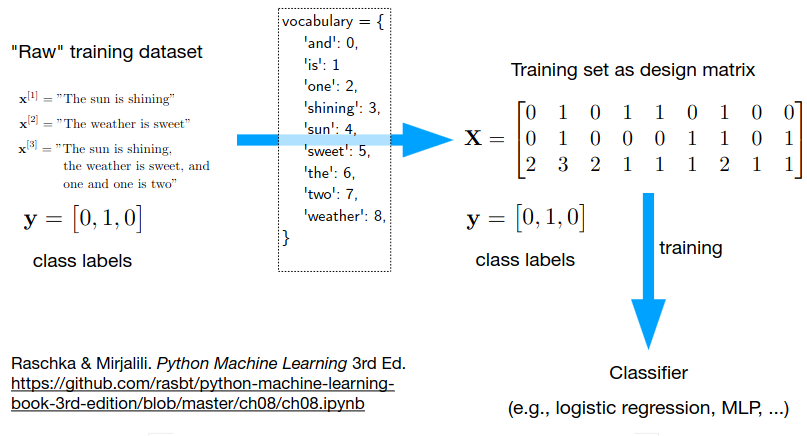

see the tutorial about : [**L15.1: Different Methods for Working With Text Data**](https://www.youtube.com/watch?v=kwmZtkzB4e0)

The intuition behind **BoW** is that it assume that the text belonging to given text in dataset is characterized by a unique set of words. if two text have nearly the same words, so they belong the same **bag**.

In this tutorial we'll use the [IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews), to build our **BoW Model**

> #### About Dataset:
>
> This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets.It provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.


In [21]:
# import libraries:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import re

### Read Data : 

In [5]:
data = pd.read_csv("./data/IMDB Dataset.csv")

In [138]:
data_origin = pd.read_csv("./data/IMDB Dataset.csv")

In [7]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [11]:
data.shape

(50000, 2)

In [13]:
data["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

In [16]:
# check for missing values :
data.isna().sum()

review       0
sentiment    0
dtype: int64

The dataset contains two columns, review and sentiment. The sentiment column is the target variable, with two classes: positive and negative, stored as object data type. Additionally, the review column contains HTML tags in the second row, indicating that preprocessing will be necessary.

In [19]:
# check the data is balanced: 
data["sentiment"].value_counts(normalize=True)

sentiment
positive    0.5
negative    0.5
Name: proportion, dtype: float64

### Data Cleaning & Preprocessing:

#### Remove hmlt tags:  

In [41]:
def remove_html_tags(text: str) -> str:
    return re.compile("<.*?>").sub(r"", text)

In [42]:
# remove html args: 
data["review"] = data.review.apply(lambda row: remove_html_tags(row))

In [43]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


#### Remove urls :

In [74]:
# check for urls:
def check_for_urls():
    for i in range(data.shape[0]):
        l = re.compile(r'https?://\S+|www\.\S+').findall(data.iloc[i, 0])
        if len(l) != 0:
            print(l); break
check_for_urls()

['www.cei.org.', 'www.cei.org/pdf/5539.pdf']


In [81]:
def remove_urls(text: str) -> str:
    return re.compile(r'https?://\S+|www\.\S+',  flags=re.IGNORECASE).sub(r"", text)

In [82]:
# remove urls: 
data["review"] = data.review.apply(remove_urls)

In [83]:
check_for_urls()

#### Transform text to lower case :

In [84]:
# make all review lower case: 
data["review"] = data.review.str.lower()

In [86]:
data["review"][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

#### Remove Stop words:

In [89]:
import nltk 
from nltk.corpus import stopwords

In [93]:
# download stopwords for english 'en': 
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/moussa/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [97]:
!unzip /home/moussa/nltk_data/corpora/stopwords.zip -d /home/moussa/nltk_data/corpora/stopwords

Archive:  /home/moussa/nltk_data/corpora/stopwords.zip
   creating: /home/moussa/nltk_data/corpora/stopwords/stopwords/
  inflating: /home/moussa/nltk_data/corpora/stopwords/stopwords/dutch  
  inflating: /home/moussa/nltk_data/corpora/stopwords/stopwords/german  
  inflating: /home/moussa/nltk_data/corpora/stopwords/stopwords/slovene  
  inflating: /home/moussa/nltk_data/corpora/stopwords/stopwords/hungarian  
  inflating: /home/moussa/nltk_data/corpora/stopwords/stopwords/romanian  
  inflating: /home/moussa/nltk_data/corpora/stopwords/stopwords/kazakh  
  inflating: /home/moussa/nltk_data/corpora/stopwords/stopwords/turkish  
  inflating: /home/moussa/nltk_data/corpora/stopwords/stopwords/russian  
  inflating: /home/moussa/nltk_data/corpora/stopwords/stopwords/README  
  inflating: /home/moussa/nltk_data/corpora/stopwords/stopwords/italian  
  inflating: /home/moussa/nltk_data/corpora/stopwords/stopwords/english  
  inflating: /home/moussa/nltk_data/corpora/stopwords/stopwords/gree

In [100]:
stop_words_set = set(stopwords.words("english"))

In [103]:
def remove_stopwords(text: str) -> str:
    return " ".join(filter(lambda word: word not in stop_words_set, text.split()))

In [106]:
# Test the function: 
remove_stopwords("The main idea is one the main they, so how we can say")

'The main idea one main they, say'

In [107]:
# remove stop words: 
data["review"] = data.review.apply(remove_stopwords)

In [109]:
data["review"][0]

"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold nickel, inmates who'll kill order g

#### Lemmatize reviews:

In [112]:
from textblob import Word

nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /home/moussa/nltk_data...


True

> **Lemmatizing:** a word means finding its base or root form using a specified algorithm or lookup table

In [134]:
def lemmatize_words(text: str) -> str:
    return " ".join(Word(word).lemmatize() for word in text.split())

In [132]:
Word("children").lemmatize()

'child'

In [135]:
# lemmatizing words: 
data["review"] = data.review.apply(lemmatize_words)

In [137]:
data["review"][0]

"one reviewer mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scene violence, set right word go. trust me, show faint hearted timid. show pull punch regard drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focus mainly emerald city, experimental section prison cell glass front face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealing shady agreement never far away.i would say main appeal show due fact go show dare. forget pretty picture painted mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste oz, got accustomed high level graphic violence. violence, injustice (crooked guard who'll sold nickel, inmate who'll kill order get away it, well ma

In [139]:
data_origin["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

#### Steaming reviews: 

In [144]:
def stem_words(text: str) -> str:
    return " ".join(Word(word).stem() for word in text.split())

In [148]:
Word("downloading").stem()

'download'

In [149]:
# stemming words: 
data["review"] = data.review.apply(stem_words)

In [150]:
data.review[0]

"one review mention watch 1 oz episod hooked. right, exactli happen me.th first thing struck oz brutal unflinch scene violence, set right word go. trust me, show faint heart timid. show pull punch regard drugs, sex violence. hardcore, classic use word.it call oz nicknam given oswald maximum secur state penitentary. focu mainli emerald city, experiment section prison cell glass front face inwards, privaci high agenda. em citi home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgi deal shadi agreement never far away.i would say main appeal show due fact go show dare. forget pretti pictur paint mainstream audiences, forget charm, forget romance...oz mess around. first episod ever saw struck nasti surreal, say readi it, watch more, develop tast oz, got accustom high level graphic violence. violence, injustic (crook guard who'll sold nickel, inmat who'll kill order get away it, well mannered, middl class inmat turn prison bitch du

In [151]:
data_origin.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

#### Binarize sentiments: 

Convert the sentiment column to integer field containing 1 and 0, equivalent to positive and negative, respectively.

In [154]:
sentiment_coding = {"positive": 1, "negative": 0}

data.sentiment = data.sentiment.replace(sentiment_coding).astype(int)

In [157]:
data.head(5)

,review,sentiment
0,one review mention watch 1 oz episod hooked. r...,1
1,wonder littl production. film techniqu unassum...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there' famili littl boy (jake) think the...,0
4,"petter mattei' ""love time money"" visual stun f...",1


In [158]:
data_origin.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Split data into Train, Test data set: 

In [165]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(data.review.values, data.sentiment.values, test_size=0.2)

In [172]:
X_train[:1]

array(['rememb movi 12, amazing.. rememb day like thing watch back then, even tri buy like rock hors sh*t! anyway, act bit chewi stori amaz consid real b movi low budget event fight scene amaz watch, must watch 20 times. well made movi love idea fight giant man control robots, piti spoil make crappi spin "crash burn", watch movi way total pants! real sci-fi movi fan watch this, re-mad today would winner.. realli would love see remak even releas dvd it.'],
      dtype=object)

In [173]:
y_train[:1]

array([1])

### Bag of Words Model:

In [174]:
from sklearn.feature_extraction.text import CountVectorizer

In [176]:
# build a count vectorizer <=> BoW vectorizer:
bow = CountVectorizer()

In [177]:
X_train = bow.fit_transform(X_train)

In [182]:
X_test = bow.transform(X_test)

In [186]:
X_train[:2].toarray().sum(axis=1)

array([ 81, 194])

### Train Models: 

In [190]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

#### Train model: 

In [188]:
mnb_classifier = MultinomialNB()

In [189]:
mnb_classifier.fit(X_train, y_train)

MultinomialNB()

#### Metrics: 

In [197]:
# accuracy scrore: 
accuracy_score(y_train, mnb_classifier.predict(X_train))

0.89795

In [193]:
# accuracy scrore: 
accuracy_score(y_test, mnb_classifier.predict(X_test))

0.8612

In [196]:
# classificarion report: 
print(classification_report(y_test, mnb_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      5061
           1       0.87      0.84      0.86      4939

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



#### References:

- The preprocessing methods used in this code are inspired by a notebook on Kaggle that focuses on sentiment analysis of the IMDb dataset: [https://www.kaggle.com/code/temiyemi/nlp-sentiment-analysis-of-imdb-dataset](https://www.kaggle.com/code/temiyemi/nlp-sentiment-analysis-of-imdb-dataset)